# Introduccion
**Objetivo del Notebook:**  
Este notebook tiene como objetivo presentar y guiar el análisis de datos de manera estructurada, permitiendo una comprensión clara de su propósito, procesos y conclusiones esperadas. A lo largo de este documento, pretendemos sentar las bases para la manipulacion y visualizacion de datos en el entorno de python.

**Importancia del Análisis de Datos:**  
El análisis de datos se ha convertido en una herramienta esencial en diversas áreas, con aplicaciones prácticas que abarcan desde la optimización de ventas hasta estudios de mercado detallados. Por ejemplo:

- **Análisis de ventas:** Identificar tendencias en el comportamiento de los clientes, predecir picos de demanda y optimizar el inventario.
  
- **Estudios de mercado:** Comprender mejor las preferencias de los consumidores y adaptar las estrategias comerciales.
  
- **Simulaciones matemáticas:** Facilita la creación de modelos para simular comportamientos complejos.
  

Estas aplicaciones permiten a las organizaciones adaptarse a los cambios del mercado, mejorar su competitividad y tomar decisiones basadas en evidencia.

**Requisitos Previos:**  
Para aprovechar al máximo este notebook, es recomendable contar con conocimientos básicos de Python, incluyendo:
- Estructuras de datos simples (listas, diccionarios, tuplas).
  
- Variables y operaciones básicas.
  
- Funciones y conceptos básicos de programación.

Estos conocimientos facilitarán la comprensión de los procedimientos de análisis y permitirán profundizar en las herramientas empleadas durante el análisis.


# Configuración del Entorno

## Instalación de librerías necesarias
Para comenzar, necesitamos instalar algunas librerías esenciales para el análisis de datos. Usaremos `pip`, el gestor de paquetes de Python, para instalar las siguientes librerías si aún no están instaladas:

In [ ]:
pip install pandas numpy matplotlib seaborn

## Importación de librerías
Una vez que las librerías estén instaladas, es necesario importarlas a nuestro entorno de trabajo. La importación de librerías es esencial para poder utilizar sus funcionalidades. A continuación se muestra cómo importar las librerías que vamos a utilizar:

In [180]:
import pandas as pd  # Pandas para manipulación y análisis de datos
import numpy as np    # Numpy para operaciones numéricas
import matplotlib.pyplot as plt  # Matplotlib para visualización de gráficos

# Introducción a Pandas y Numpy

## ¿Qué son Pandas y Numpy?

- **Pandas**: Es una librería fundamental para la manipulación y análisis de datos en Python. Proporciona estructuras de datos flexibles, como el `DataFrame`, que permiten trabajar con grandes volúmenes de datos de manera eficiente.

- **Numpy**: Es una librería que ofrece soporte para operaciones numéricas de alto rendimiento y manipulación de arreglos multidimensionales. Es especialmente útil cuando se necesitan realizar cálculos matemáticos complejos.

## Creación de series y dataframes

- **Series**: Es una estructura unidimensional que puede almacenar datos de cualquier tipo (enteros, cadenas, flotantes, etc.). Se puede crear a partir de listas, diccionarios o arrays de Numpy.

  Ejemplo de creación de una serie:


In [181]:
data = [10, 20, 30, 40]
series = pd.Series(data)
print(series)

0    10
1    20
2    30
3    40
dtype: int64


- **DataFrames**: Un DataFrame es una estructura bidimensional similar a una tabla de datos, con filas y columnas etiquetadas. Es ideal para representar datasets más grandes y complejos.

Ejemplo de creación de un DataFrame desde un diccionario:

In [182]:
data = {'Nombre': ['Ana', 'Luis', 'Pedro'],
        'Edad': [23, 30, 25]}

df = pd.DataFrame(data)
print(df)

  Nombre  Edad
0    Ana    23
1   Luis    30
2  Pedro    25


Ejemplo de creación de un DataFrame desde una lista:

In [183]:
data = [
    {"Nombre": "Ana", "Edad": 23},
    {"Nombre": "Luis", "Edad": 30},
    {"Nombre": "Pedro", "Edad": 25}
]

df = pd.DataFrame(data)
print(df)

  Nombre  Edad
0    Ana    23
1   Luis    30
2  Pedro    25


## Operaciones basicas de un DataFrame de pandas
 **Selección de columnas:** Puedes seleccionar una columna específica de un DataFrame utilizando el nombre de la columna.

Ejemplo:


In [184]:
edades = df['Edad']
print(edades)

0    23
1    30
2    25
Name: Edad, dtype: int64


 **Filtrado de datos:** Es posible filtrar las filas del DataFrame según ciertas condiciones o criterios.

Ejemplo:

In [185]:
df_filtrado = df[df['Edad'] > 25]
print(df_filtrado)

  Nombre  Edad
1   Luis    30


Tambien puede utilizarse el metodo .query utilizando un filtrado dado por condiciones, mencionar que ambos metodos son igual de validos, pero se recomienda usar el metodo query debido a su escalabilidad a consultas mas grandes.

In [186]:
df_filtrado = df.query("Edad < 25")
print(df_filtrado)

  Nombre  Edad
0    Ana    23


 **Renombrado de columnas:** Si necesitas cambiar el nombre de las columnas, puedes usar el método .rename().
Ejemplo:

In [187]:
df.rename(columns={'Edad': 'Años'}, inplace=True)
print(df)

  Nombre  Años
0    Ana    23
1   Luis    30
2  Pedro    25


 **Creacion de nuevas columnas:** Puedes crear nuevas columnas ingresando datos del mismo numero de entradas (filas) que nuestro dataset actual, esto lo podemos hacer creando los datos desde otra fuente, o creando nuevos datos a partir de informacion ya contenida en el dataset, a continuacion ambos ejemplos.
Ejemplo:

In [188]:
df["Año_Nacimiento"] = 2024 - df["Años"] 
df["Altura"] = np.random.normal(160, 30, size=3)
print(df)

  Nombre  Años  Año_Nacimiento      Altura
0    Ana    23            2001  140.607863
1   Luis    30            1994  145.790826
2  Pedro    25            1999  209.599143


## Introduccion al Analisis Basico
El análisis básico de datos es un paso fundamental para entender la estructura y contenido de un conjunto de datos. Podemos realizar tareas como explorar el tamaño, la composición, las estadísticas descriptivas y las relaciones entre las variables del dataset.

Este análisis inicial nos ayuda a:

- Identificar posibles errores o valores atípicos en los datos.
- Comprender las características de las variables.
- Guiar las decisiones en las etapas posteriores del análisis o modelado.
  
A continuación, realizaremos un análisis básico utilizando métodos de Pandas que nos permitirán explorar el dataset de manera eficiente.
Para contextualizar un poco, en estos ejemplos estaremos usando el dataset de Galton's Height, el cual es un estudio que trata de ver la correlacion entre la altura de los padres y la altura de sus hijos, asi como factores que afecten estos datos.

### Familiarizarse con un dataset

**Visualizar primeras filas del dataset**

In [189]:
heights = pd.read_csv("data/Families.csv")  # Obtener datos a traves de archivo csv
heights.head(n= 5)  # Metodo modificable bajo el parametro n 

,family,father,mother,children,childGender,childHeight
0,001,78.5,67.0,4,male,73.2
1,001,78.5,67.0,4,female,69.2
2,001,78.5,67.0,4,female,69.0
3,001,78.5,67.0,4,female,69.0
4,002,75.5,66.5,4,male,73.5


In [190]:
heights.tail(n= 3) #Igual que head, pero usando las ultimas filas

,family,father,mother,children,childGender,childHeight
931,203,62.0,66.0,3,female,61.0
932,204,62.5,63.0,2,male,66.5
933,204,62.5,63.0,2,female,57.0


**Mostrar la informacion sobre la estructura del dataset**

In [191]:
heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   family       934 non-null    object 
 1   father       934 non-null    float64
 2   mother       934 non-null    float64
 3   children     934 non-null    int64  
 4   childGender  934 non-null    object 
 5   childHeight  934 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 43.9+ KB


**Mostrar las estadisticas descriptivas de las columnas numericas del dataset**

In [192]:
heights.describe()

,father,mother,children,childHeight
count,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,6.171306,66.745931
std,2.476479,2.290886,2.729025,3.579251
min,62.000000,58.000000,1.000000,56.000000
25%,68.000000,63.000000,4.000000,64.000000
50%,69.000000,64.000000,6.000000,66.500000
75%,71.000000,65.875000,8.000000,69.700000
max,78.500000,70.500000,15.000000,79.000000


**Comparacion de conteo de valores encontrados en el dataset**
Este enfoque es particularmente util en variables categoricas, debido a que son las que tienden a repetirse entre diferentes entradas

In [193]:
heights["children"].value_counts()

children
5     140
8     136
4     124
7     119
6     108
3      66
9      63
2      46
11     44
10     40
1      33
15     15
Name: count, dtype: int64

### Agrupacion y agregacion de datos
Para poder realizar analisis mas especificos es probable que querramos crear agrupaciones de nuestro interes para centrar ideas dentro de cierto grupo, con esto llegamos al metodo .groupby() que toma como parametro principal el nombre de una de las columnas de nuestro dataset, y agrupar los datos en base a una categoria.

Por ejemplo, en este caso trataremos de responder a la pregunta, cual es la familia mas alta del dataset?

In [194]:
grouped = heights[["family", "father", "mother", "childHeight"]].groupby("family").mean() # Obtenemos la media de altura de cada miembro
grouped["family_mean"] = (grouped["father"] + grouped["mother"] + grouped["childHeight"]) / 3
grouped

,father,mother,childHeight,family_mean
family,,,,
001,78.5,67.0,70.100000,71.866667
002,75.5,66.5,69.250000,70.416667
003,75.0,64.0,69.500000,69.500000
004,75.0,64.0,66.700000,68.566667
005,75.0,58.5,66.750000,66.750000
...,...,...,...,...
200,64.0,63.0,64.500000,63.833333
201,64.0,60.0,63.000000,62.333333
202,63.0,63.5,66.000000,64.166667


**Usar .sort_values() para ordenar los valores de forma descendente** 

In [ ]:
sorted_group = grouped.sort_values("family_mean", ascending=False)
sorted_group.head() # Obtenemos el top 5 familias mas altas

,father,mother,childHeight,family_mean
family,,,,
001,78.5,67.0,70.100000,71.866667
007,74.0,68.0,71.833333,71.277778
063,70.0,68.0,75.000000,71.000000
035,71.0,69.0,72.800000,70.933333
020,72.7,69.0,70.050000,70.583333


Nota: Se recomienda no crear manipulaciones sobre el dataset original, a no ser que estos cambios deseen ser permanentes, de esta manera evitamos comprometer la integridad de los datos

## Uso de NumPy en DataFrames
NumPy proporciona funciones matemáticas y de álgebra lineal de alto rendimiento, mientras que Pandas se enfoca en la manipulación de datos, permitiendo trabajar con datos estructurados de manera fácil y eficiente. Juntas, estas bibliotecas permiten realizar análisis de datos de manera más rápida y flexible.

### Operaciones Matemáticas en un DataFrame utilizando NumPy
Pandas permite realizar operaciones matemáticas y estadísticas en columnas de DataFrame de manera eficiente utilizando NumPy:

In [196]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    "A": [1, 5, 3, 10],
    "B": [5, 6, 7, 8]
})

# Sumar 10 a cada valor en la columna "A"
df["A"] = df["A"] + 10

# Usar funciones de NumPy para realizar operaciones
df["C"] = np.sqrt(df["B"])  # Raíz cuadrada de la columna B

print(df)

    A  B         C
0  11  5  2.236068
1  15  6  2.449490
2  13  7  2.645751
3  20  8  2.828427


### Cálculos Estadísticos usando NumPy
Pandas integra funciones estadísticas, pero también puedes usar funciones de NumPy para realizar cálculos más avanzados:

In [197]:
# Promedio de una columna
mean_a = np.mean(df["A"])

# Desviación estándar de una columna
std_b = np.std(df["B"])

# Correlación entre columnas
correlation = np.corrcoef(df["A"], df["B"])

print(f"Promedio A: {mean_a}, Desviación estándar B: {std_b}\n Matriz de Correlación: \n{correlation}")

Promedio A: 14.75, Desviación estándar B: 1.118033988749895
 Matriz de Correlación: 
[[1.         0.83565784]
 [0.83565784 1.        ]]


### Funciones de Álgebra Lineal con Pandas y NumPy
Puedes realizar operaciones de álgebra lineal en matrices y DataFrames utilizando NumPy:

In [198]:
# Crear matrices
matrix_1 = np.array([[1, 2], [3, 4]])
matrix_2 = np.array([[5, 6], [7, 8]])

# Producto de matrices
matrix_product = np.dot(matrix_1, matrix_2)

# Inversa de una matriz
matrix_inverse = np.linalg.inv(matrix_1)

print("Producto de matrices:")
print(matrix_product)

print("Inversa de la matriz:")
print(matrix_inverse)

Producto de matrices:
[[19 22]
 [43 50]]
Inversa de la matriz:
[[-2.   1. ]
 [ 1.5 -0.5]]


In [199]:
np.corrcoef(heights["childHeight"], heights["father"])

array([[1.        , 0.26603854],
       [0.26603854, 1.        ]])

# Introduccion a la visualizacion de datos con Matplotlib
Matplotlib es una librería de visualización en Python que permite crear gráficos estáticos, animados e interactivos. Su objetivo principal es representar datos de forma visual para facilitar la comprensión y el análisis, permitiendo a los usuarios identificar patrones, tendencias y relaciones en los datos de manera clara y efectiva. Matplotlib se combina muy bien con pandas, muchas funciones estan enfocadas para ser usadas en dataframes comodamente

## Tipos de Gráficos Básicos
Usaremos el dataset de Galton Heights utilizado anteriormente

### Gráfico de Líneas 
Usado para mostrar la relación entre dos variables continuas, típicamente para mostrar tendencias a lo largo del tiempo.

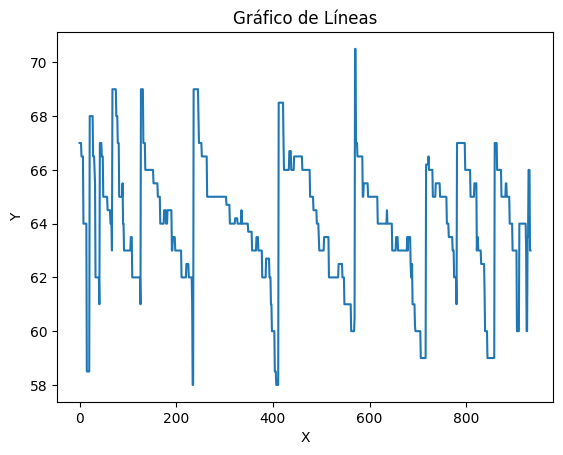

In [208]:
plt.plot(heights.index, heights["mother"])
plt.title("Gráfico de Líneas")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Gráfico de Barras 
Utilizado para comparar valores entre diferentes categorías.

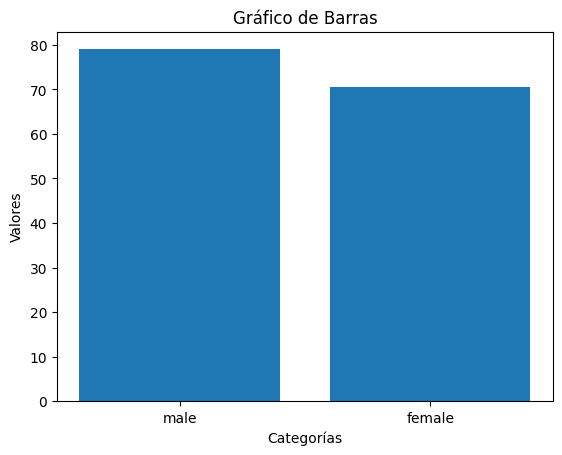

In [201]:
plt.bar(heights["childGender"], heights["childHeight"])
plt.title("Gráfico de Barras")
plt.xlabel("Categorías")
plt.ylabel("Valores")
plt.show()

### Gráfico de Dispersión (Scatter Plot)
Usado para mostrar la relación entre dos variables continuas, donde cada punto representa un par de valores.

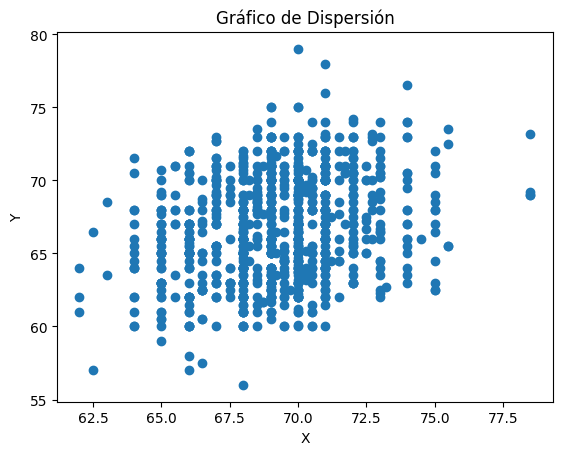

In [202]:
plt.scatter(heights["father"], heights["childHeight"])
plt.title("Gráfico de Dispersión")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Personalizacion de graficos
Matplotlib permite personalizar los gráficos de muchas maneras:

### Colores
Puedes especificar colores usando nombres de colores, códigos hexadecimales o RGB.

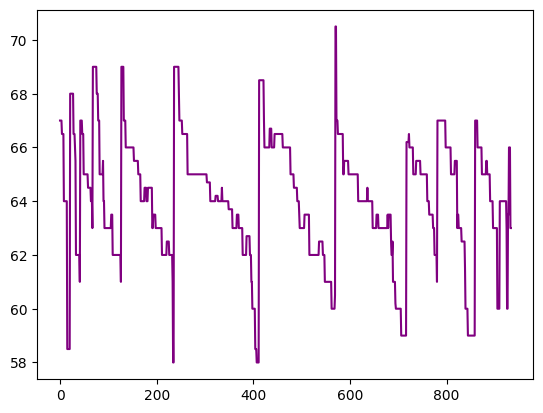

In [209]:
plt.plot(heights.index, heights["mother"], color="purple")
plt.show()

### Etiquetas:
Es posible agregar títulos y etiquetas a los ejes.

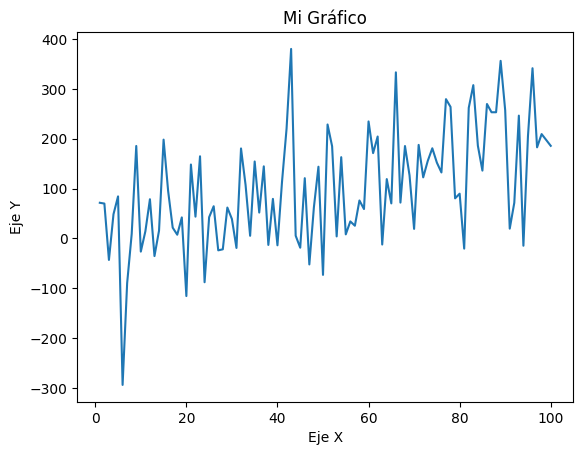

In [ ]:
# Generacion de datos ejemplo
x= np.linspace(1,100,100)
y= x * 2 + np.random.normal(0, 100, size=100)


plt.plot(x, y)
plt.title("Mi Gráfico")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

### Leyenda 
Si tienes varias series de datos, puedes añadir una leyenda para identificarlas.

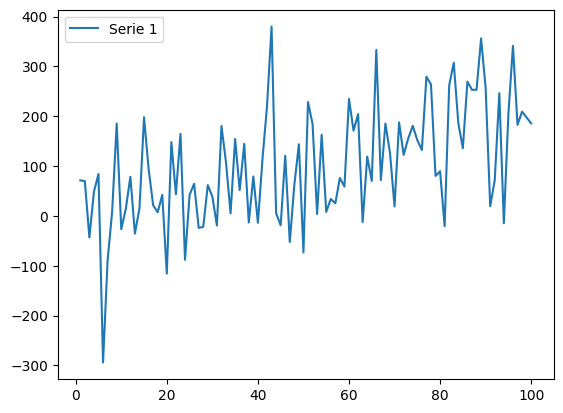

In [205]:
plt.plot(x, y, label="Serie 1")
plt.legend()
plt.show()

### Estilo de líneas y marcadores
Puedes cambiar el estilo de las líneas y los marcadores.

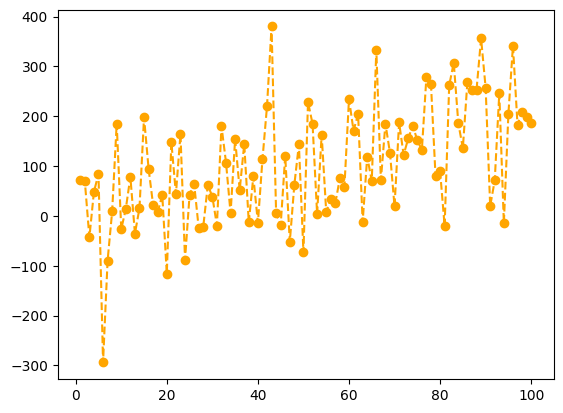

In [206]:
plt.plot(x, y, linestyle="--", marker="o", color="orange")
plt.show()

## Graficos avanzados
En esta sección, exploraremos gráficos avanzados con Matplotlib, donde aprenderemos a crear visualizaciones más complejas que no solo enriquecen los análisis, sino que también ayudan a comunicar hallazgos de manera clara y profesional. Estos gráficos incluyen subgráficos, boxplots, mapas de calor y otros, cada uno con aplicaciones prácticas específicas.

### Subgraficos con subplots
 Los subgráficos permiten mostrar múltiples visualizaciones en una sola figura, organizadas en filas y columnas. Esto es útil para comparar diferentes conjuntos de datos de manera eficiente.

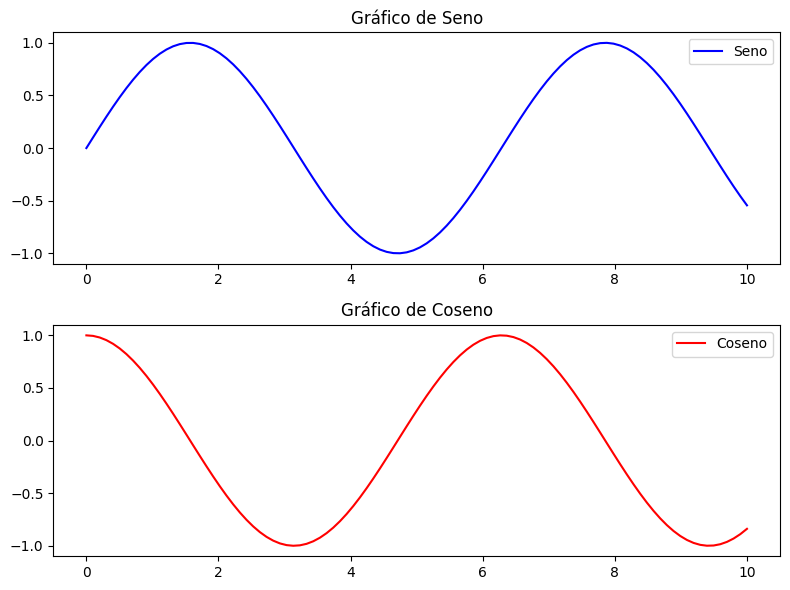

In [213]:
x = np.linspace(0, 10, 100)
y1, y2 = np.sin(x), np.cos(x)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(x, y1, label="Seno", color="blue")
axs[0].set_title("Gráfico de Seno")
axs[0].legend()

axs[1].plot(x, y2, label="Coseno", color="red")
axs[1].set_title("Gráfico de Coseno")
axs[1].legend()

plt.tight_layout()
plt.show()

### Gráfico de Boxplot
El boxplot es ideal para resumir la distribución de un conjunto de datos, destacando la mediana, los cuartiles y valores atípicos, lo cual es valioso en el análisis exploratorio.

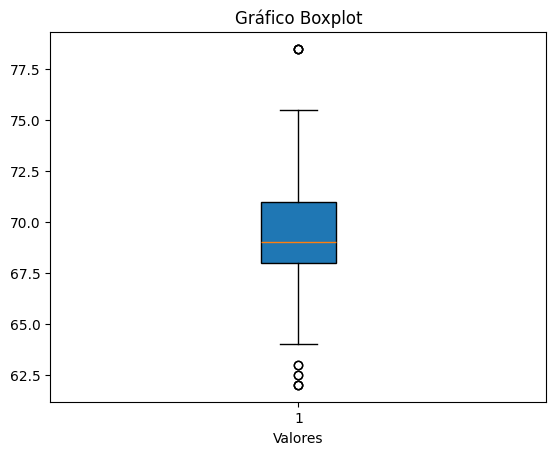

In [223]:
plt.boxplot(heights["father"], patch_artist=True)
plt.title("Gráfico Boxplot")
plt.xlabel("Valores")
plt.show()

### Gráfico de Heatmap (Mapa de Calor)
Los mapas de calor permiten representar valores en una matriz de datos mediante colores, facilitando la identificación de patrones, relaciones y concentraciones.

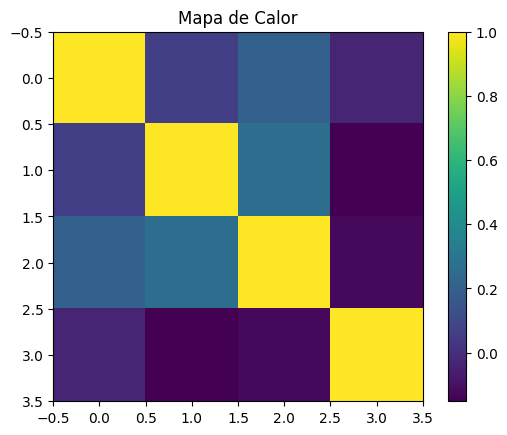

In [245]:
# Crear una matriz
corr_matrix = heights[["mother", "father", "childHeight", "children"]].corr()

plt.imshow(corr_matrix, cmap="viridis", interpolation="nearest")
plt.title("Mapa de Calor")
plt.colorbar()
plt.show()

### Gráfico de Series Temporales con Formateo de Fechas
Este gráfico se centra en datos temporales y permite un eje de tiempo bien formateado para identificar tendencias y patrones en función de las fechas.

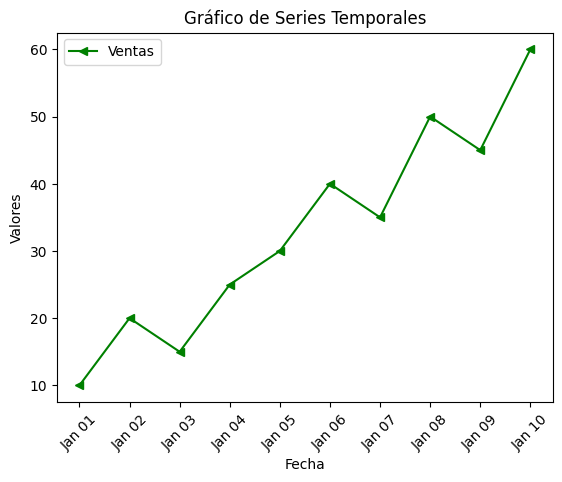

In [265]:
import matplotlib.dates as mdates

dates = pd.date_range(start="2023-01-01", periods=10)
values = [10, 20, 15, 25, 30, 40, 35, 50, 45, 60]

plt.plot(dates, values, marker="<", label="Ventas", color="green")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title("Gráfico de Series Temporales")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Gráfico de Pareto
El gráfico de Pareto combina barras y líneas para destacar las categorías más relevantes y su contribución acumulativa, ayudando en la toma de decisiones estratégicas.

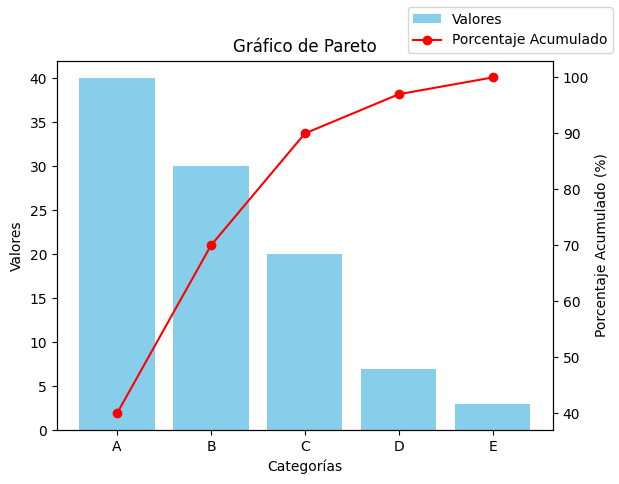

In [258]:
categorias = ["A", "B", "C", "D", "E"]
valores = [40, 30, 20, 7, 3]
porcentajes = [sum(valores[:i+1]) / sum(valores) * 100 for i in range(len(valores))]

fig, ax1 = plt.subplots()
ax1.bar(categorias, valores, color="skyblue", label="Valores")
ax2 = ax1.twinx()
ax2.plot(categorias, porcentajes, color="red", marker="o", label="Porcentaje Acumulado")

ax1.set_title("Gráfico de Pareto")
ax1.set_xlabel("Categorías")
ax1.set_ylabel("Valores")
ax2.set_ylabel("Porcentaje Acumulado (%)")
fig.legend(loc="upper right")
plt.show()

### Gráfico 3D
Los gráficos tridimensionales son útiles para mostrar relaciones en datos que tienen tres variables, proporcionando una perspectiva más completa de los datos. Se recomienda usarlos con proposito exploratorios, no es recomendable el presentar graficos 3D a una audiencia dado al ruido visual que suele agregar.

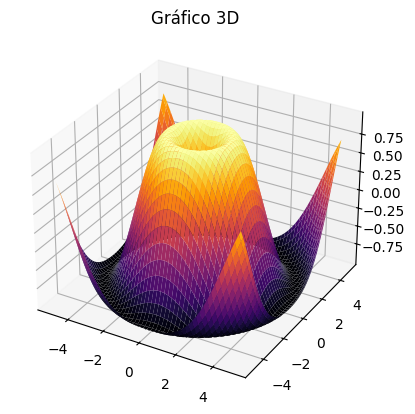

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap="inferno")
plt.title("Gráfico 3D")
plt.show()